In [1]:
import pandas as pd
import numpy as np
import LanusStats as ls
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mplsoccer import PyPizza, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import math
import colorsys
from scipy import stats

In [2]:
data = {
    'position': ['ST', 'CF', 'LW', 'RW', 'CAM', 'LM', 'RM', 'CM', 'CDM', 'CB', 'LB', 'RB', 'GK'],
    'complete_position': [
        'Centre-Forward', 'Second Striker', 'Left Winger', 'Right Winger', 
        'Attacking Midfield', 'Left Midfield', 'Right Midfield', 'Central Midfield', 
        'Defensive Midfield', 'Centre-Back', 'Left-Back', 'Right-Back', 'Goalkeeper'
    ],
    'group': ['FW', 'FW', 'FW', 'FW', 'MF', 'MF', 'MF', 'MF', 'MF', 'DF', 'DF', 'DF', 'GK'],
    'sub_group': [
        'Striker', 'Striker', 'Winger', 'Winger', 'Attacking Midfield', 
        'Midfielder', 'Midfielder', 'Midfielder', 'Defensive Midfield', 
        'Back', 'Lateral', 'Lateral', 'Goalkeeper'
    ],
    'stats': [
        ['shooting_Gls', 'stats_G-PK', 'stats_xG', 'stats_npxG', 'diff_xG', 'diff_npxG', 'shooting_Sh', 'shooting_SoT%', 'stats_PrgP', 'gca_SCA', 'gca_GCA', 'misc_Won%', 'defensive_actions', 'possession_Att Pen', 'possession_Att', 'possession_Succ%'],
        ['shooting_Gls', 'stats_G-PK', 'stats_xG', 'stats_npxG', 'diff_xG', 'diff_npxG', 'shooting_Sh', 'shooting_SoT%', 'stats_PrgP', 'gca_SCA', 'gca_GCA', 'misc_Won%', 'defensive_actions', 'stats_PrgC', 'possession_Att', 'possession_Succ%'],
        ['stats_Gls', 'diff_xG', 'stats_Ast', 'diff_xAG', 'gca_PassLive', 'passing_Cmp%', 'stats_PrgP', 'passing_KP', 'passing_1/3', 'passing_types_Crs', 'defensive_actions', 'stats_PrgC', 'possession_1/3', 'possession_Att', 'possession_Succ%'],
        ['stats_Gls', 'diff_xG', 'stats_Ast', 'diff_xAG', 'gca_PassLive', 'passing_Cmp%', 'stats_PrgP', 'passing_KP', 'passing_1/3', 'passing_types_Crs', 'defensive_actions', 'stats_PrgC', 'possession_1/3', 'possession_Att', 'possession_Succ%'],
        ['stats_Gls', 'diff_xG', 'stats_Ast', 'diff_xAG', 'gca_PassLive', 'passing_Cmp%', 'stats_PrgP', 'passing_KP', 'passing_1/3', 'passing_types_TB', 'defensive_actions', 'stats_PrgC', 'possession_1/3', 'possession_Att', 'possession_Succ%'],
        [],  # LM
        [],  # RM
        [],  # CM
        [],  # CDM
        [],  # CB
        [],  # LB
        [],  # RB
        []   # GK
    ],
    'stats_names': [
        ['Goals', 'no pk goals', 'xG', 'no pk xG', 'xG - Goals', 'npkxG - npkGoals', 'Shots', 'Shots on target %', 'Prog passes', 'SCA', 'GCA', 'Aerial won %', 'Def actions', 'Touches P-area', 'Dribbling', 'Dribbling succ %'],
        ['Goals', 'no pk goals', 'xG', 'no pk xG', 'xG - Goals', 'npkxG - npkGoals', 'Shots', 'Shots on target %', 'Prog passes', 'SCA', 'GCA', 'Aerial won %', 'Def actions', 'Prog Carries', 'Dribbling', 'Dribbling succ %'],
        ['Goals', 'Goals - xG', 'Asists', 'Asists - xAG', 'Passes to shots', 'Passes succ %', 'Prog passes', 'Key passes', 'Passes Att 3rd', 'Crosses', 'Def actions', 'Prog Carries', 'Carries Att 3rd', 'Dribbling', 'Dribbling succ %'],
        ['Goals', 'Goals - xG', 'Asists', 'Asists - xAG', 'Passes to shots', 'Passes succ %', 'Prog passes', 'Key passes', 'Passes Att 3rd', 'Crosses', 'Def actions', 'Prog Carries', 'Carries Att 3rd', 'Dribbling', 'Dribbling succ %'],
        ['Goals', 'Goals - xG', 'Asists', 'Asists - xAG', 'Passes to shots', 'Passes succ %', 'Prog passes', 'Key passes', 'Passes Att 3rd', 'Through passes', 'Def actions', 'Prog Carries', 'Carries Att 3rd', 'Dribbling', 'Dribbling succ %'],
        [],  # LM
        [],  # RM
        [],  # CM
        [],  # CDM
        [],  # CB
        [],  # LB
        [],  # RB
        []   # GK
    ],
    'stats_type': [
        ['Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Passing', 'Scoring Opportunities', 'Scoring Opportunities', 'Scoring Opportunities', 'Defensive Actions', 'Dribbling', 'Dribbling', 'Dribbling'],
        ['Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Shooting', 'Passing', 'Scoring Opportunities', 'Scoring Opportunities', 'Scoring Opportunities', 'Defensive Actions', 'Dribbling', 'Dribbling', 'Dribbling'],
        ['Shooting', 'Shooting', 'Shooting', 'Shooting', 'Scoring Opportunities', 'Passing', 'Passing', 'Passing', 'Passing', 'Passing', 'Defensive Actions', 'Carries', 'Carries', 'Dribbling', 'Dribbling'],
        ['Shooting', 'Shooting', 'Shooting', 'Shooting', 'Scoring Opportunities', 'Passing', 'Passing', 'Passing', 'Passing', 'Passing', 'Defensive Actions', 'Carries', 'Carries', 'Dribbling', 'Dribbling'],
        ['Shooting', 'Shooting', 'Shooting', 'Shooting', 'Scoring Opportunities', 'Passing', 'Passing', 'Passing', 'Passing', 'Passing', 'Defensive Actions', 'Carries', 'Carries', 'Dribbling', 'Dribbling'],
        [],  # LM
        [],  # RM
        [],  # CM
        [],  # CDM
        [],  # CB
        [],  # LB
        [],  # RB
        []   # GK
    ]
}

# Crear el DataFrame
df_positions = pd.DataFrame(data)

with open('D:\Futbol\Analisis de datos\Diagramas de renidmiento\data\df_position.pkl', 'wb') as archivo:
    pkl.dump(df_positions, archivo, protocol=pkl.HIGHEST_PROTOCOL)

In [ ]:
['Copa de la Liga', 'Primera Division Argentina', 'Primera Division Uruguay', 'Brasileirao', 'Brasileirao B', 'Primera Division Colombia', 'Primera Division Chile', 'Primera Division Peru', 'Primera Division Venezuela', 'Primera Division Ecuador', 'Primera Division Bolivia', 'Primera Division Paraguay', 'Brasileirao F', 'MLS', 'USL Championship', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Serie A', 'Big 5 European Leagues', 'Danish Superliga', 'Eredivise', 'Primeira Liga Portugal', 'Copa America', 'Euros']
['EPL', 'EFL Championship', 'EFL1', 'EFL2', 'Bundesliga', '2.Bundesliga', 'Serie A', 'Serie B', 'La Liga', 'La Liga 2', 'Ligue 1', 'Ligue 2', 'Eredivisie', 'Scottish PL', 'Super Lig', 'Jupiler Pro League', 'Liga Nos', 'Russian Premier League', 'Brasileirao', 'Argentina Liga Profesional', 'MLS']

In [3]:
def players_data_etl(league:str, season:str):
    
    def extract_positions(text):
        # Dividir el texto por saltos de línea y espacios en blanco
        lines = text.split('\n')
        positions = []
        for line in lines:
            # Dividir por espacios y quitar espacios en blanco
            pos = ' '.join(line.split())[2:].strip()
            # Si la línea no está vacía y no contiene solo números, añadir a la lista
            if pos and not pos[0].isdigit():
                positions.append(pos)
        return positions
    
    top_5 = ['Premier League', 'La Liga', 'Bundesliga', 'Serie A', 'Ligue 1']
    season_tm = '-'.join([año[2:] for año in season.split('-')])
    
    def rename_duplicate_columns(df):
        cols = pd.Series(df.columns)
        
        for dup in cols[cols.duplicated()].unique(): 
            dup_indices = cols[cols == dup].index.tolist()
            for i, idx in enumerate(dup_indices):
                if i == 0:
                    continue
                cols[idx] = f'{dup}_{i}'

        df.columns = cols
        return df
    
    def infer_and_convert_dtypes(df):
        for col in df.columns:
            try:
                df[col] = df[col].astype(int)
            except ValueError:
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    df[col] = df[col].astype(str)
        
        return df
        
    fbref = ls.Fbref()
    
    if league == 'Top 5':
        league_dfs = []
        for league_ in top_5:
            # DataFrame de FBref
            df_fb = fbref.get_all_player_season_stats(league=league_, season=season)
            df_fb[0].rename(columns={'Player':'player'}, inplace=True)
            # DataFrame de TransferMarket
            df_tm = pd.read_csv(f'D:\Futbol\Analisis de datos\Diagramas de renidmiento\data\{league_.replace(" ", "_").lower()}_players_{season_tm}.csv')
            df_tm = df_tm[df_tm['Citizenship'] != '[]']
            df_tm.rename(columns={'Name':'player'}, inplace=True)
            df_tm['positions'] = df_tm.apply(lambda row: [str(row['Position'])] if str(row['Other positions']) == 'nan' else  [str(row['Position'])] + extract_positions(str(row['Other positions'])), axis=1)
            df_tm = df_tm[['player', 'positions']].reset_index(drop=True)
            df = pd.merge(df_fb[0], df_tm, on='player')
            league_dfs.append(df)
        df_players = pd.concat(league_dfs, ignore_index=True)

    elif league in top_5:
        # DataFrame de FBref
            df_fb = fbref.get_all_player_season_stats(league=league, season=season)
            df_fb[0].rename(columns={'Player':'player'}, inplace=True)
            # DataFrame de TransferMarket
            df_tm = pd.read_csv(f'D:\Futbol\Analisis de datos\Diagramas de renidmiento\data\{league.replace(" ", "_").lower()}_players_{season_tm}.csv')
            df_tm = df_tm[df_tm['Citizenship'] != '[]']
            df_tm.rename(columns={'Name':'player'}, inplace=True)
            df_tm['positions'] = df_tm.apply(lambda row: [str(row['Position'])] if str(row['Other positions']) == 'nan' else  [str(row['Position'])] + extract_positions(str(row['Other positions'])), axis=1)
            df_tm = df_tm[['player', 'positions']].reset_index(drop=True)
            df_players = pd.merge(df_fb[0], df_tm, on='player')
    
    else: raise ValueError(f"The league '{league}' is not available. Please choose one of the following: {', '.join(top_5)}, Top_5")
       
    return infer_and_convert_dtypes(rename_duplicate_columns(df_players))

In [6]:
def plot_player_pizza_chart(player:str, scp_league:str, scp_season:str, player_position:str, compare_position:str):
    
    def rgb_to_hex(rgb:str):
        return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

    def hex_to_rgb(hex_color:str):
        hex_color = hex_color.lstrip('#')
        return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

    def generate_analogous_colors(center_color:str, n:int):
        rgb_center = hex_to_rgb(center_color)
        hsv_center = colorsys.rgb_to_hsv(*rgb_center)
        
        step = 30 / 360.0
        analogous_colors = []
        
        for i in range(1, (n // 2) + 1):
            new_hue_positive = (hsv_center[0] + i * step) % 1.0
            new_hue_negative = (hsv_center[0] - i * step) % 1.0
            analogous_colors.append(colorsys.hsv_to_rgb(new_hue_positive, hsv_center[1], hsv_center[2]))
            analogous_colors.append(colorsys.hsv_to_rgb(new_hue_negative, hsv_center[1], hsv_center[2]))
        
        analogous_colors_rgb = [rgb_to_hex(color) for color in analogous_colors]
        
        return analogous_colors_rgb
    
    def assign_colors_to_categories(categories, center_color):
        unique_categories = list(set(categories))
        num_categories = len(unique_categories)
        colors = generate_analogous_colors(center_color, num_categories)
        color_assignment = dict(zip(unique_categories, colors))
        
        return [color_assignment[category] for category in categories]
    
    # Variables de extraccion y carga
    main_path = 'D:\Futbol\Analisis de datos\\'
    img_path = main_path + 'img\\'
    
    # Extraccion de recursos
    with open(main_path + 'Diagramas de renidmiento\data\df_position.pkl', 'rb') as archivo:
        df_position = pkl.load(archivo)
    
    with open(main_path + 'Diagramas de renidmiento\data\df_team_colours.pkl', 'rb') as archivo:
        dict_colours = pkl.load(archivo)
        
    URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/ttf/RobotoSlab-Regular.ttf?raw=true'
    robotoslab_regular = FontManager(URL2)
    regular = robotoslab_regular
    URL3 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/ttf/RobotoSlab-Bold.ttf?raw=true'
    robotoslab_bold = FontManager(URL3)
    bold = robotoslab_bold
    
    # Extraccion de datos
    df = players_data_etl(league=scp_league, season=scp_season)
    
    # Variables
    team = df[df['player'] == player]['stats_Squad'].iloc[0]
    league = df[df['player'] == player]['stats_Comp'].iloc[0]
    season = '-'.join([año[2:] for año in scp_season.split('-')])
    colour_1 = dict_colours[df[df['player'] == player]['stats_Squad'].iloc[0]][0] # Color 1 del equipo
    colour_2 = dict_colours[df[df['player'] == player]['stats_Squad'].iloc[0]][1] # Color 2 del equipo
    colour_left = '#292929'  # Color de la izquierda
    colour_right = '#1E1E1E'  # Color de la derecha
    # Dimensiones de los rectángulos
    width_left = 0.4
    width_right = 0.6
    height = 1
    # Posiciones de los rectángulos
    x_left = 0
    y_left = 0
    x_right = width_left
    y_right = 0
    
    compare_pos = df_position[(df_position['position'] == compare_position) | (df_position['group'] == compare_position) | (df_position['sub_group'] == compare_position)]['complete_position'].unique().tolist()
    stats_pos = df_position[(df_position['position'] == compare_position) | (df_position['group'] == compare_position) | (df_position['sub_group'] == compare_position)][['stats', 'stats_names', 'stats_type']].iloc[0].to_list()
    stats_pos[0].extend(['player', 'stats_Squad', 'minutes_played'])
    
    # Calculo de estadisticas
    df['defensive_actions'] = df['defense_Tkl'] + df['defense_Tkl_1'] + df['defense_Int']
    df['diff_xG'] = df['stats_Gls'] - df['stats_xG']
    df['diff_npxG'] = df['stats_G-PK'] - df['stats_npxG']
    df['diff_xAG'] = df['stats_Ast'] - df['stats_xAG']
    df['minutes_played'] = df['stats_Min'].str.replace(',', '').astype(int)

    # Filtrado
    df = df[df['positions'].apply(lambda pos_list: any(pos in pos_list for pos in compare_pos))][stats_pos[0]]

    stats_pos.append(assign_colors_to_categories(stats_pos[2], dict_colours[df[df['player'] == player]['stats_Squad'].iloc[0]][0]))
    
    # Calculo de percentiles para estadisticas
    values_player = list(df[df['player'] == 'Cole Palmer'].iloc[:,:-3].reset_index(drop=True).iloc[0].values)
    
    values = []
    for x in range(len(stats_pos[0][:-3])):   
        values.append(math.floor(stats.percentileofscore(df[df['minutes_played'] > df['minutes_played'].quantile(.3)][stats_pos[0][:-3][x]], values_player[x])))
    
    # Visualizacion
    fig, ax = plt.subplots(figsize=(16, 9), dpi=330)
    #Creacion del fondo
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.add_patch(patches.Rectangle((x_left, y_left), width_left, height, color=colour_left, linewidth=0))
    ax.add_patch(patches.Rectangle((x_right, y_right), width_right, height, color=colour_right, linewidth=0))
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    
    # Lado izquierdo
    inset_ax_left = inset_axes(ax, width=6, height=6, loc='center',
                            bbox_to_anchor=(x_left, y_left + .16, width_left, height),
                            bbox_transform=ax.transAxes)
    inset_ax_left.axis('off')
    # haxagono de jugador
    player_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.27, orientation=np.radians(30), color=colour_2, ec='none', zorder=2)
    inset_ax_left.add_patch(player_hexagon)
    
    player_outer_hexagon = patches.RegularPolygon((0.6, 0.5), numVertices=6, radius=0.29, orientation=np.radians(30), color='none', ec=colour_1, linewidth=6, zorder=0)
    inset_ax_left.add_patch(player_outer_hexagon)
    # Hexagono de escudo de equipo 
    logo_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.15, orientation=np.radians(30), color=colour_2, ec='none', zorder=2)
    inset_ax_left.add_patch(logo_hexagon)

    logo_outer_hexagon = patches.RegularPolygon((0.275, .69), numVertices=6, radius=0.17, orientation=np.radians(30), color='none', ec=colour_1, linewidth=6, zorder=0)
    inset_ax_left.add_patch(logo_outer_hexagon)

    rect = patches.Rectangle((.175, .22), .585, .65, transform=inset_ax_left.transAxes, color=colour_left, zorder=1)
    inset_ax_left.add_patch(rect)
    
    # Carga de imagenes
    # Funciones para transformar las coordenadas
    DC_to_FC = inset_ax_left.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    
    # Localizacion de imagenes
    logo_img_path = img_path + f'escudos {league.lower()}\\' + team + '.png'
    player_img_path = img_path + f'\jugadores\{league.lower()}\\' + str(player).replace(' ', '_').lower() + '_' + season + '.png'
    
    # Escudo del equipo
    logo = Image.open(logo_img_path)
    desired_size_1 = (1000, 1000)  # Tamaño deseado para las imágenes redimensionadas
    logo = logo.resize(desired_size_1, Image.Resampling.LANCZOS)
    logo = np.array(logo)
    coord = DC_to_NFC((0.275, .69))  # Coordenadas transformadas
    ax_logo = inset_axes(inset_ax_left, width=1.7, height=1.7, loc='center',
                         bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)
    ax_logo.imshow(logo)
    ax_logo.axis('off')
    
    # Foto del jugador
    player_img = Image.open(player_img_path)
    orig_width, orig_high = player_img.size
    new_high = 1800
    new_width = int((orig_width / orig_high) * new_high)
    desired_size_2 = (new_width, new_high)  # Tamaño deseado para las imágenes redimensionadas
    player_img = player_img.resize(desired_size_2, Image.Resampling.LANCZOS)
    player_img = np.array(player_img)
    coord = DC_to_NFC((0.6, 0.5 + .058))  # Coordenadas transformadas
    ax_logo = inset_axes(inset_ax_left, width=3.5, height=3.5, loc='center',
                        bbox_to_anchor=coord, bbox_transform=inset_ax_left.transAxes)
    ax_logo.imshow(player_img)
    ax_logo.axis('off')
    
    # Texto
    inset_ax_left_text = inset_axes(ax, width=6.4, height=4.5, loc='center',
                                    bbox_to_anchor=(x_left, y_left - .249, width_left, height),
                                    bbox_transform=ax.transAxes)
    inset_ax_left_text.axis('off')

    inset_ax_left_text.annotate(xy=(.5, .75),
                                text=player + f'\nDynamic radar',
                                size=30,
                                color='white',
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=bold.prop)

    inset_ax_left_text.annotate(xy=(.5, .55),
                                text=f'{league} ' + season,
                                size=20,
                                color=colour_1,
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=regular.prop)
    
    line_width = 0.25
    line_height = 0.001
    line_radius = line_height / 2
    line_x = .5 - (line_width/2)
    line_y = 0.45
    
    rounded_line = patches.FancyBboxPatch((line_x, line_y), line_width, line_height,
                                        boxstyle='round,pad=0.007,rounding_size=0.005',
                                        facecolor=colour_2, ec='none')
    inset_ax_left_text.add_patch(rounded_line)
    
    inset_ax_left_text.annotate(xy=(.5, .31),
                                text=f'Compared to other\n{league} ' + compare_position,
                                size=20,
                                color=colour_1,
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=regular.prop)

    # Disclaimer
    inset_ax_left_text.annotate(xy=(.5, 0.05),
                                text=f'Data from Opta as of 11th of November 2023 | viz by @jeremy_bordarampe',
                                size=12,
                                color='white',
                                ha='center',
                                va='center',
                                annotation_clip=False,
                                fontproperties=regular.prop)

    # Grafico de Pizza
    inset_ax_right = fig.add_axes([x_right - .1, y_right + .1, .8, .8], polar=True)
    inset_ax_right.set_facecolor(colour_right)

    baker = PyPizza(params=stats_pos[1],
                    background_color=colour_right,
                    straight_line_color=colour_right,
                    straight_line_lw=1,
                    last_circle_lw=2,
                    last_circle_color=colour_left,
                    other_circle_color=colour_left,
                    other_circle_lw=2,
                    other_circle_ls='-.',
                    inner_circle_size=10)

    # plot pizza
    baker.make_pizza(values, 
                    ax=inset_ax_right,
                    color_blank_space=None,
                    value_bck_colors=stats_pos[3],
                    blank_alpha=.2,
                    kwargs_slices=dict(color=colour_2, edgecolor=colour_1, zorder=2, linewidth=1),
                    kwargs_params=dict(color='white', fontsize=15,
                                        fontproperties=regular.prop, va="center"),
                    kwargs_values=dict(color='#000000', fontsize=11,
                                        fontproperties=bold.prop, zorder=3,
                                        bbox=dict(edgecolor='#000000', boxstyle='round,pad=0.4,rounding_size=.8',
                                        lw=0)))

    inset_ax_right.annotate(xy=(0, -10),
                            text=player_position,
                            size=15,
                            color='white',
                            ha='center',
                            va='center',
                            annotation_clip=False,
                            fontproperties=bold.prop)
    
    # Guardar la figura sin bordes blancos
    plt.savefig('D:\Futbol\Analisis de datos\Diagramas de renidmiento\img\\' + player + ' dynamic radar comapre ' + compare_position + '.png', bbox_inches='tight', pad_inches=0)

    # Mostrar la figura
    plt.show()

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


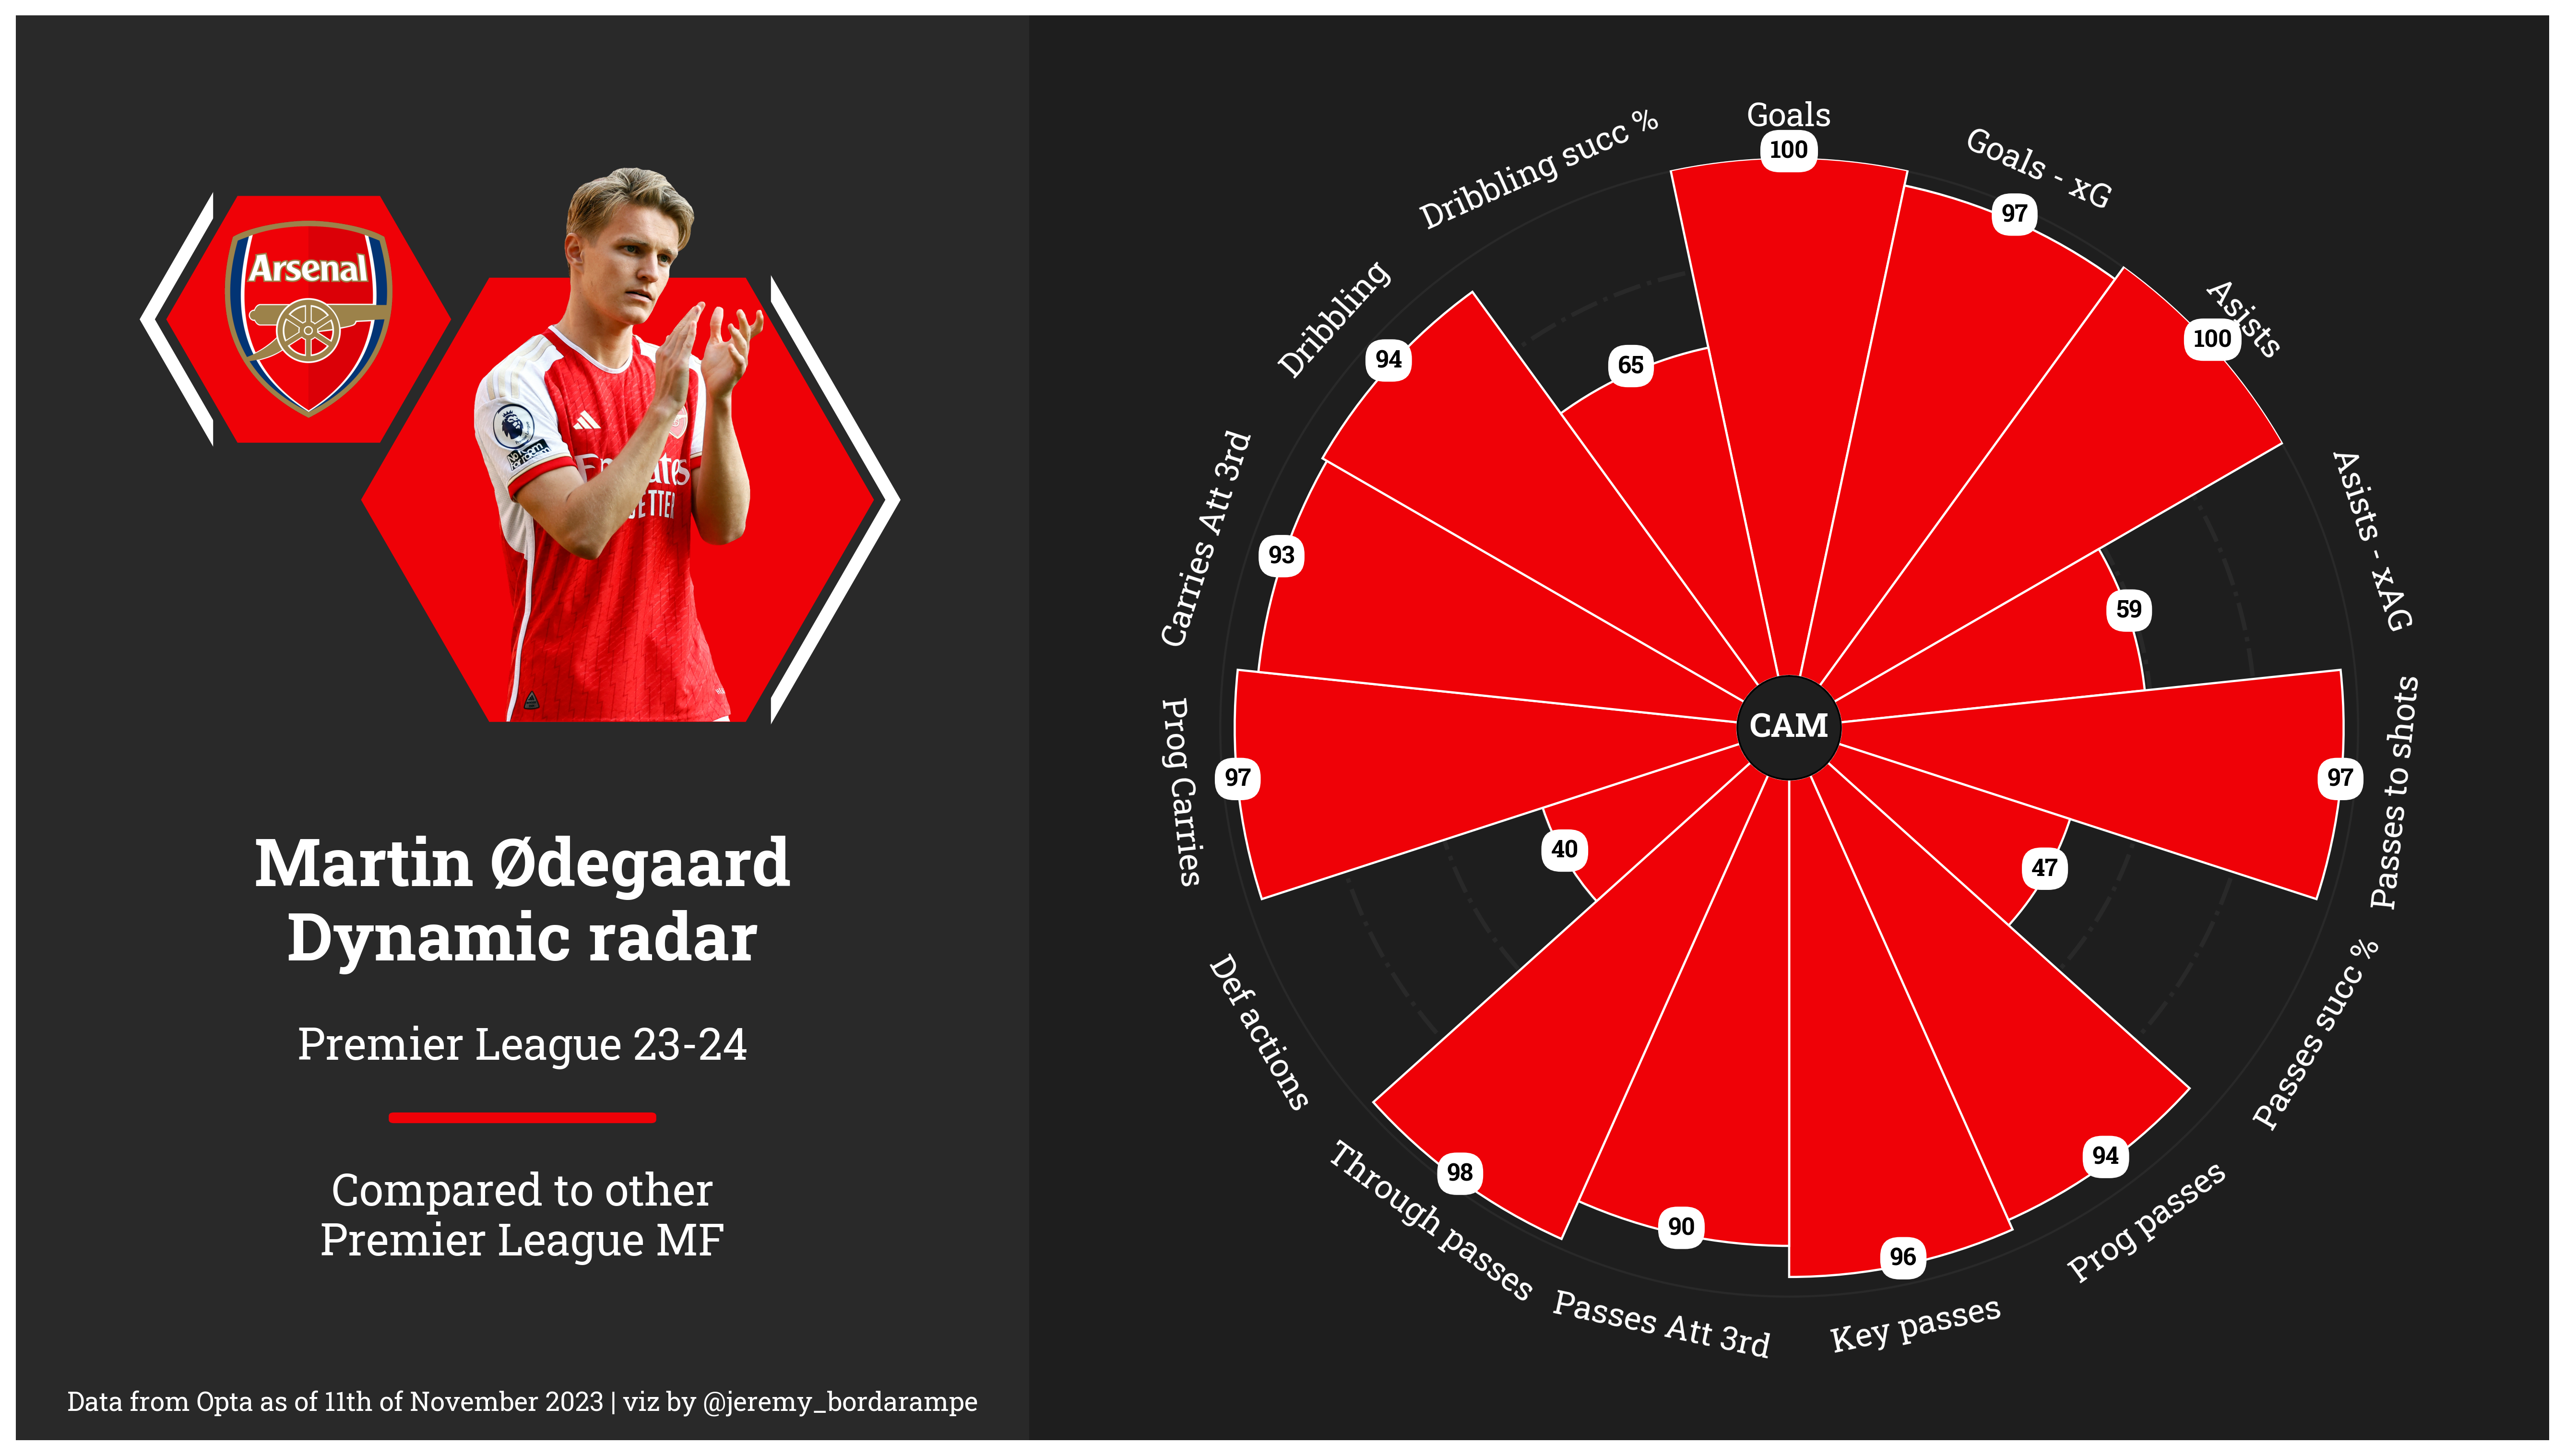

In [5]:
plot_player_pizza_chart(player='Martin Ødegaard', scp_league='Premier League', scp_season='2023-2024', player_position='CAM', compare_position='MF')